# Exploratory Data Analysis

In [107]:
import pandas as pd
import nlp_id
import matplotlib.pyplot as plt
import datetime as dt
import re
import os

## Exploration

In [2]:
data = pd.read_csv('./data/raw.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20895 entries, 0 to 20894
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   content             20895 non-null  object
 1   username            20895 non-null  object
 2   tweet_published_at  20895 non-null  object
 3   type                20895 non-null  object
dtypes: object(4)
memory usage: 653.1+ KB


In [4]:
data.head()

,content,username,tweet_published_at,type
0,ini serius Coldplay mau konser di Indo?,fahmiach_,2023-05-02 06:43:55+07,tweet
1,Gak sabar nonton coldplay 🥹🥲 @woootamelon semo...,LSuroyaa,2023-05-02 06:42:14+07,tweet
2,"Kayak 50% masih nangisin ten, 25% kepikiran tx...",chittenyawn,2023-05-02 06:29:04+07,tweet
3,Trus apa Coldplay ngerasa dia plagiat? Enggak....,lacvnna,2023-05-02 06:16:23+07,replied_to
4,coldplay ke indonesia cmn 1x yang mo b nntn kr...,rialdi_achmad,2023-05-11 19:36:52+07,tweet


In [5]:
data['type'].unique()

array(['tweet', 'replied_to', 'retweet'], dtype=object)

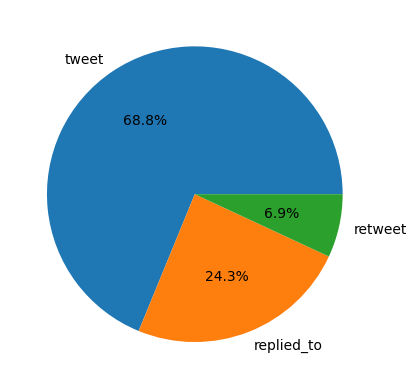

In [6]:
chart_labels = data['type'].unique()
chart_size = [len(data[data['type'] == key]) for key in chart_labels]

fig, ax = plt.subplots()
ax.pie(chart_size, labels=chart_labels, autopct='%1.1f%%')
plt.show()

### Memfilter data berdasarkan tweet yang mengandung mention

In [7]:
data_mention_only = data[data['content'].apply(lambda x: len(re.findall(r'(\@\w+)', x)) > 0)]
data_mention_only

,content,username,tweet_published_at,type
1,Gak sabar nonton coldplay 🥹🥲 @woootamelon semo...,LSuroyaa,2023-05-02 06:42:14+07,tweet
25,@jn_jiu @mistamosby Ga suka coldplay 😭😭😭,COMRADE_SOLAR,2023-05-04 00:07:38+07,replied_to
29,"Huhu ada lagiii, HALOOO @coldplay https://t.co...",bekstreettt,2023-05-05 12:46:14+07,replied_to
33,Salah satu tanda @coldplay ke Indonesia untuk ...,SeleccionINA,2023-05-07 10:42:19+07,tweet
38,@IDWantsColdplay @coldplay Bismillah menang wa...,finyjr,2023-05-08 23:02:38+07,replied_to
...,...,...,...,...
20877,@0tk0il man666 ots kenapa yah aku kalo denger ...,perdott_,2023-05-11 00:55:10+07,replied_to
20880,@kegblgnunfaedh Yakali ngga coldplay\n\nhttps:...,Ruangtummbuh,2023-05-11 00:54:42+07,replied_to
20883,@yfurip Beliin gue tiket coldplay buruan!!,titislukita,2023-05-11 00:53:05+07,replied_to
20884,"@0tk0il wkwk menurut gue coldplay juga b aja, ...",Dwiky_Alfi,2023-05-11 00:52:51+07,replied_to


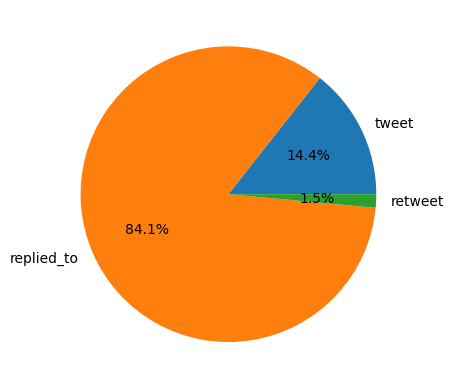

In [8]:
chart_labels = data_mention_only['type'].unique()
chart_size = [len(data_mention_only[data_mention_only['type'] == key]) for key in chart_labels]

fig, ax = plt.subplots()
ax.pie(chart_size, labels=chart_labels, autopct='%1.1f%%')
plt.show()

### User dengan tweet paling banyak
karena banyaknya user maka hanya diambil 10 teratas

In [9]:
count_tweets = []
for username, data_group in data.groupby(by='username'):
  count_tweets.append((username, len(data_group)))
count_tweets = pd.DataFrame(count_tweets, columns=['username', 'count'])

In [10]:
data_count_tweets = count_tweets.sort_values(by='count', ascending=False)[:10]

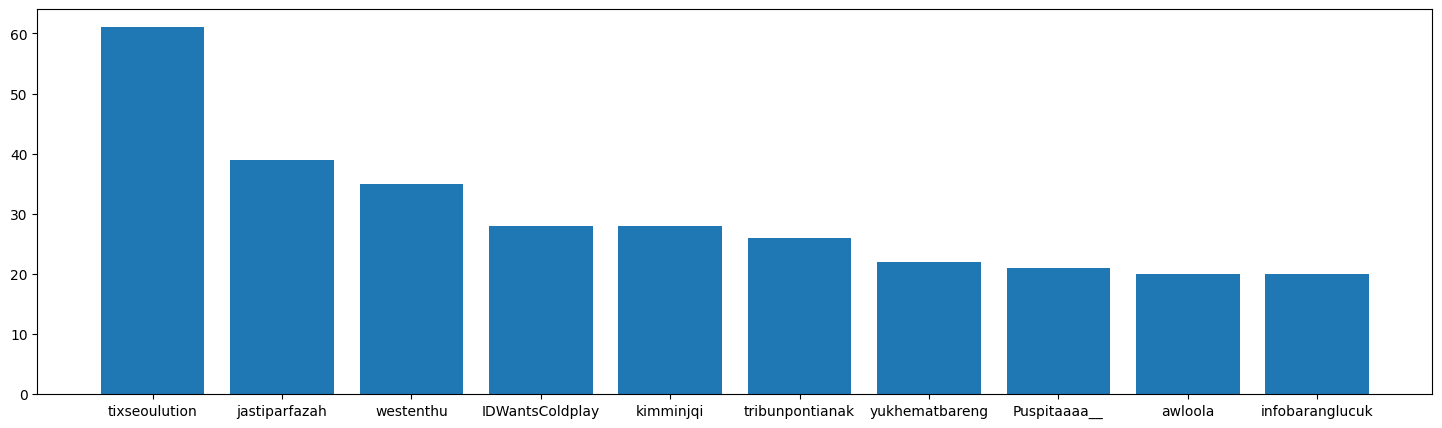

In [11]:
chart_labels = data_count_tweets['username'].to_numpy()
chart_size = data_count_tweets['count'].to_numpy()

plt.figure(figsize=(18,5))
plt.bar(chart_labels, chart_size)
plt.show()

### Mengelompokan data berdasarkan tanggal

In [20]:
data_bydate = data['tweet_published_at'].apply(lambda x: f"{dt.datetime.fromisoformat(x).date().year}-{dt.datetime.fromisoformat(x).date().month}")

In [40]:
data_bydate.unique()

array(['2023-5', '2023-4', '2023-3', '2023-6', '2021-7', '2022-10',
       '2022-11', '2012-8', '2022-12', '2023-2', '2023-1', '2022-8',
       '2022-4', '2022-7', '2021-5', '2022-3', '2010-12', '2020-1',
       '2020-2', '2017-5', '2022-9', '2020-11', '2019-3', '2019-9'],
      dtype=object)

In [36]:
data_bydate = data_bydate[data_bydate.apply(lambda x: len(re.findall(r'2023-\w+',x)) > 0)]

In [37]:
chart_labels = data_bydate.apply(lambda x: str(x)).unique()
chart_size = [len(data_bydate[data_bydate == x]) for x in chart_labels]

In [42]:
chart_size

[20643, 150, 22, 26, 9, 14]

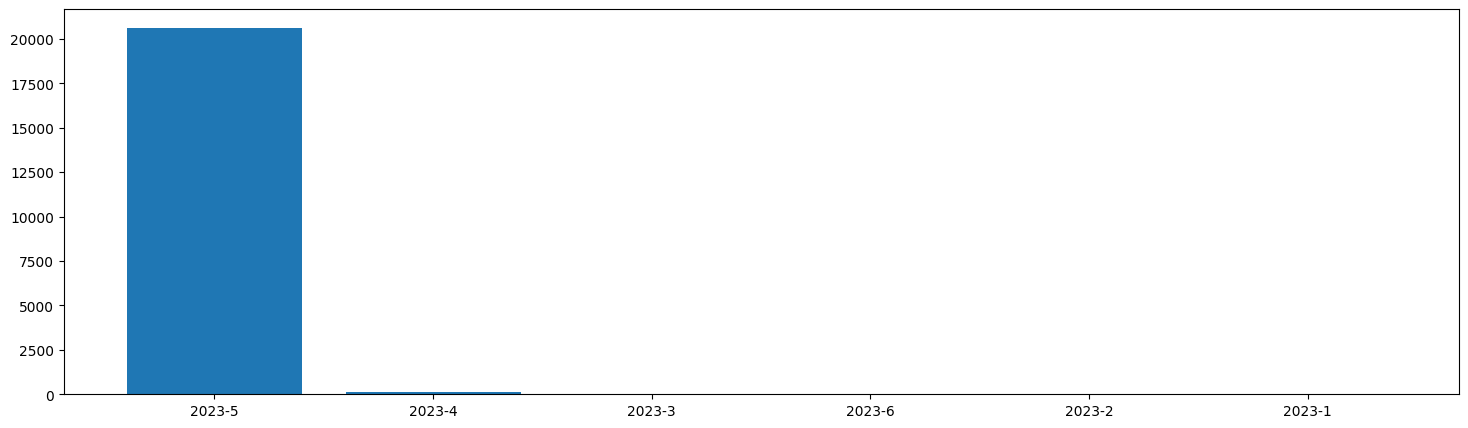

In [38]:
plt.figure(figsize=(18,5))
plt.bar(chart_labels, chart_size)
plt.show()

### Feature Extraction
data yang yang diambil merupakan data tweet yang berada di tahun 2023 dan tweet yang mengandung mention

In [70]:
data['date'] = data['tweet_published_at'].apply(lambda x: dt.datetime.fromisoformat(x).date())

In [71]:
df = data[data['date'].apply(lambda x: len(re.findall(r'(2023-\w+)', str(x))) > 0)]

perbandingan jumlah setelah diambil hanya data tweet di tahun 2023

In [72]:
len(data), len(df)

(20895, 20864)

In [73]:
len(data['username'].unique()), len(df['username'].unique())

(15850, 15845)

mengambil tweet yang hanya memiliki mention

In [ ]:
df['mentioned'] = df['content'].apply(lambda x: re.findall(r'(\@\w+)', x))

In [78]:
df = df[df['mentioned'].apply(lambda x: len(x) > 0)]

perbandingan tweet yang hanya memiliki mention

In [81]:
len(data), len(df)

(20895, 5428)

In [82]:
len(data['username'].unique()), len(df['username'].unique())

(15850, 4393)

In [80]:
df[['content', 'username', 'mentioned']]

,content,username,mentioned
1,Gak sabar nonton coldplay 🥹🥲 @woootamelon semo...,LSuroyaa,[@woootamelon]
25,@jn_jiu @mistamosby Ga suka coldplay 😭😭😭,COMRADE_SOLAR,"[@jn_jiu, @mistamosby]"
29,"Huhu ada lagiii, HALOOO @coldplay https://t.co...",bekstreettt,[@coldplay]
33,Salah satu tanda @coldplay ke Indonesia untuk ...,SeleccionINA,"[@coldplay, @coldplay]"
38,@IDWantsColdplay @coldplay Bismillah menang wa...,finyjr,"[@IDWantsColdplay, @coldplay]"
...,...,...,...
20877,@0tk0il man666 ots kenapa yah aku kalo denger ...,perdott_,[@0tk0il]
20880,@kegblgnunfaedh Yakali ngga coldplay\n\nhttps:...,Ruangtummbuh,[@kegblgnunfaedh]
20883,@yfurip Beliin gue tiket coldplay buruan!!,titislukita,[@yfurip]
20884,"@0tk0il wkwk menurut gue coldplay juga b aja, ...",Dwiky_Alfi,[@0tk0il]


## Preprocessing 
melakukan data preprocessing pada kolom `content`

#### Membuat Function untuk preprocess

In [120]:
class StopWord(nlp_id.StopWord):
    def __init__(self, stopword_path=None):
        self.current_dir = os.path.dirname(os.path.realpath(__name__))
        if not stopword_path:
            stopword_path = os.path.join(self.current_dir, "data", "stopwords.txt")
        super(StopWord, self).__init__()
        with open(stopword_path) as f:
            additional = f.read().split('\n')
            self.stopwords = set(self.stopwords).union(set(additional))

In [160]:
stopwords = StopWord()
lemmatizer = nlp_id.Lemmatizer()
tokenizer = nlp_id.Tokenizer()

In [122]:
number_to_letter = {"1": "i", "3": "e", "4": "a", "5": "s", "9": "g", "0": "o"}

def remove_mentions(content: str):
    return re.sub(r"(\@\w+)", "", content, flags=re.MULTILINE).strip()


def remove_links(content: str):
    return re.sub(r"http\S+", "", content, flags=re.MULTILINE).strip()


def replace_strip_as_ws(content: str):
    return re.sub(r"([a-zA-Z]|\s)([-])(\s|[a-zA-Z])", r"\1 \3", content, flags=re.MULTILINE).strip()


def replace_numbers_with_letters(input_str: str):
    pattern = r"[a-zA-Z](\d+)[a-zA-Z]"
    matches = re.finditer(pattern, input_str)
    replaced_str = input_str
    for match in matches:
        number = match.group(1)
        if number in number_to_letter:
            replaced_str = replaced_str.replace(number, number_to_letter[number])
    return replaced_str


def preprocess(content: str):
    text = remove_links(content)
    text = remove_mentions(text)
    text = replace_strip_as_ws(text)
    text = stopwords.remove_stopword(text)
    text = replace_numbers_with_letters(text)
    text = lemmatizer.lemmatize(text)
    token = tokenizer.tokenize(text)
    return token

### Mengecek frequensi kata yang muncul menggunakan wordcloud

In [161]:
freqs = {}
for x in df['content'].apply(lambda x: preprocess(x)):
  for word in x:
    count = freqs.get(word, 0)
    freqs[word] = count + 1

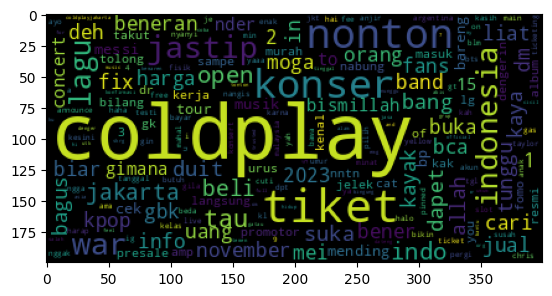

In [162]:
from wordcloud import WordCloud
plt.imshow(WordCloud().generate_from_frequencies(freqs))

### Mengimplementasikan text-preprocessing pada data

In [168]:
data_output = df[['content', 'username', 'mentioned']].copy(deep=True)
data_output['rawContent'] = data_output['content']
data_output['content'] = data_output['content'].apply(lambda x: " ".join(preprocess(x)))

In [170]:
data_output.to_csv('./data/data.tsv', sep="\t")